# Exercises XP Gold: W3_D3

## What You’ll Learn
- Generating and visualizing **univariate** and **multivariate normal distributions**.
- Understanding differences and applications of various probability distributions.
- Performing **ANOVA** for comparing more than two groups.
- Implementing and interpreting **linear regression** in SciPy.

## What You’ll Create
- Visual and analytical representations of statistical distributions.
- Text-based explanation of a real-world application of an advanced distribution.
- Statistical hypothesis testing comparing multiple groups.
- Linear regression analysis including slope, intercept, and R² interpretation.

---

## Exercises

**Exercise 1 — Multivariate Normal Distribution**  
Generate and visualize:  
- A **univariate normal distribution** using `scipy.stats.norm`  
- A **multivariate normal distribution** using `scipy.stats.multivariate_normal` (mean vector, covariance matrix).  
Compare the shape and spread of univariate vs. multivariate, and discuss the role of correlation in the multivariate case.

**Exercise 2 — Advanced Probability Distributions**  
Choose one advanced distribution (Poisson, Exponential, etc.) and **describe** (in text only) a real-world scenario where it applies, including key assumptions and implications.

**Exercise 3 — Statistical Hypothesis Testing (ANOVA)**  
Using the provided simulated sales data for 3 regions, perform a **one-way ANOVA** to determine if mean sales differ significantly.  
Data generation and example:  
```python
np.random.seed(0)
region1 = np.random.normal(20000, 3000, 30)
region2 = np.random.normal(22000, 3500, 30)
region3 = np.random.normal(25000, 5000, 30)

Report F-statistic and p-value, then interpret.

**Exercise 4 — Linear Regression Analysis**
Using the provided simulated dataset of Hours Studied vs. Test Score:
Perform simple linear regression with scipy.stats.linregress
Report slope, intercept, R², p-value
Predict the test score for a given number of study hours
Interpret the slope and R² in context

Note: Use np.random.seed() for reproducibility in all random data generation.

## Exercise 1: Multivariate Normal Distribution

Univariate sample mean/std: 0.019 0.979


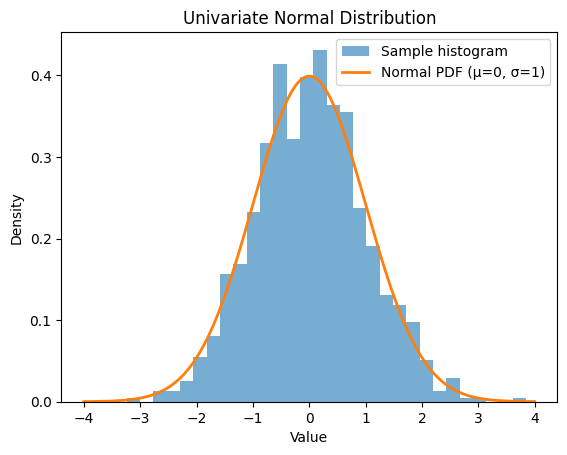

Multivariate (independent) sample mean ~ [0.033 0.057]
Multivariate (independent) sample cov ~
 [[0.925 0.003]
 [0.003 1.03 ]]

Multivariate (correlated) sample mean ~ [ 0.021 -0.028]
Multivariate (correlated) sample cov ~
 [[0.999 0.79 ]
 [0.79  0.967]]


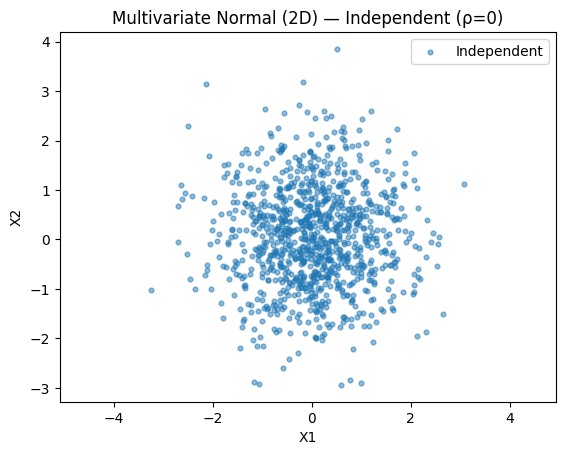

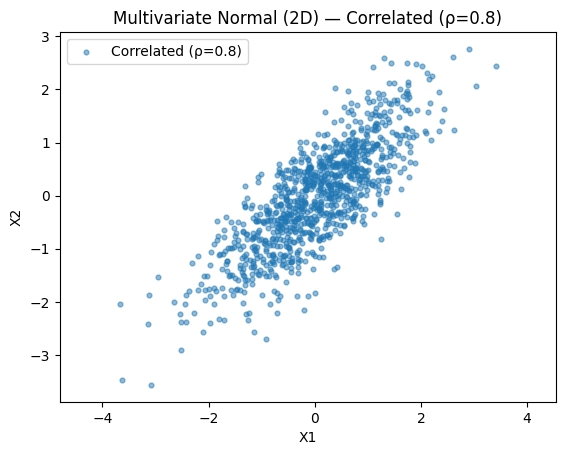

In [1]:
# Title: Exercise 1 — Univariate vs. Multivariate Normal
# Goal: Generate and visualize a univariate Normal and a 2D multivariate Normal; compare properties.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

np.random.seed(42)

# --- Univariate Normal ---
# Parameters
mu_uni, sigma_uni = 0.0, 1.0
# Sample
univariate_data = norm.rvs(loc=mu_uni, scale=sigma_uni, size=1000, random_state=42)

# Grid for PDF
x = np.linspace(mu_uni - 4*sigma_uni, mu_uni + 4*sigma_uni, 400)
pdf_uni = norm.pdf(x, loc=mu_uni, scale=sigma_uni)

print("Univariate sample mean/std:", np.mean(univariate_data).round(3), np.std(univariate_data, ddof=1).round(3))

plt.figure()
plt.hist(univariate_data, bins=30, density=True, alpha=0.6, label="Sample histogram")
plt.plot(x, pdf_uni, linewidth=2, label="Normal PDF (μ=0, σ=1)")
plt.title("Univariate Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

# --- Multivariate Normal (2D) ---
# Case A: Independent variables (diagonal covariance)
mean_ind = [0, 0]
cov_ind = [[1, 0], [0, 1]]
mv_data_ind = multivariate_normal.rvs(mean=mean_ind, cov=cov_ind, size=1000, random_state=42)

# Case B: Correlated variables (positive correlation)
rho = 0.8
mean_cor = [0, 0]
cov_cor = [[1, rho], [rho, 1]]
mv_data_cor = multivariate_normal.rvs(mean=mean_cor, cov=cov_cor, size=1000, random_state=7)

# Quick diagnostics
print("Multivariate (independent) sample mean ~", np.mean(mv_data_ind, axis=0).round(3))
print("Multivariate (independent) sample cov ~\n", np.cov(mv_data_ind.T).round(3))
print("\nMultivariate (correlated) sample mean ~", np.mean(mv_data_cor, axis=0).round(3))
print("Multivariate (correlated) sample cov ~\n", np.cov(mv_data_cor.T).round(3))

# Visualize 2D scatter
plt.figure()
plt.scatter(mv_data_ind[:,0], mv_data_ind[:,1], alpha=0.5, s=12, label="Independent")
plt.title("Multivariate Normal (2D) — Independent (ρ=0)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()

plt.figure()
plt.scatter(mv_data_cor[:,0], mv_data_cor[:,1], alpha=0.5, s=12, label="Correlated (ρ=0.8)")
plt.title("Multivariate Normal (2D) — Correlated (ρ=0.8)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis("equal")
plt.legend()
plt.show()

# Note (English):
# - Univariate normal is fully described by (mean, std).
# - Multivariate normal is described by a mean vector and a covariance matrix.
# - Off-diagonal covariance (or correlation) controls the tilt/ellipticity of the point cloud.

## Conclusion & Interpretation — Exercise 1 (Univariate vs. Multivariate Normal)

### Univariate Normal
- **Sample mean/std:** μ ≈ 0.019, σ ≈ 0.979 — very close to the target parameters μ = 0, σ = 1.
- The histogram closely matches the smooth bell-shaped PDF curve, showing that the sample is a good approximation of the theoretical distribution.
- The spread is symmetric, with most values within ±3σ, consistent with the **empirical rule**.

### Multivariate Normal (Independent)
- **Sample mean vector:** [0.033, 0.057] — close to the target [0, 0].
- **Covariance matrix:**
  \[
  \begin{pmatrix}
  0.925 & 0.003 \\
  0.003 & 1.030
  \end{pmatrix}
  \]
  - Diagonal values (~0.93 and ~1.03) are close to target variances (1).
  - Off-diagonal value (~0.003) ≈ 0 → variables are independent.
- Scatter plot: points form a roughly **circular cloud**, showing no preferred direction.

### Multivariate Normal (Correlated, ρ=0.8)
- **Sample mean vector:** [0.021, -0.028] — close to target [0, 0].
- **Covariance matrix:**
  \[
  \begin{pmatrix}
  0.999 & 0.790 \\
  0.790 & 0.967
  \end{pmatrix}
  \]
  - Strong positive covariance (~0.79) reflects target correlation ρ = 0.8.
- Scatter plot: **elliptical cloud tilted** along the diagonal, indicating that higher X1 tends to occur with higher X2.

### Key Takeaways
- **Univariate normal**: defined by mean & variance, represented as a 1D density curve.
- **Multivariate normal**: defined by a mean vector & covariance matrix; shape depends on variances (spread) and covariances (tilt).
- Correlation in the multivariate case **changes the orientation and elongation** of the data cloud.

## Exercise 2: Advanced Probability Distributions

### Exercise 2 — Advanced Probability Distribution (Text)

**Chosen distribution:** Poisson

**Real-world scenario:** Modeling the number of customer arrivals at a store per hour.

**Why Poisson?**
- We count discrete events (arrivals) in a fixed interval (e.g., 1 hour).
- Events are assumed to occur independently, with an approximately constant average rate λ (customers/hour).
- The probability of more than one arrival in a very small sub-interval is negligible.

**Implications and assumptions:**
- If historical data suggest an average of λ = 12 customers/hour, then the number of arrivals \( X \) in one hour follows \( X \sim \text{Poisson}(\lambda=12) \).
- We can compute probabilities like \( P(X=10) \) or \( P(X \ge 15) \) to plan staffing.
- Overdispersion (variance > mean) or strong time-of-day effects violate Poisson assumptions; in practice, we might use a **non-homogeneous Poisson process** or a **negative binomial** model to handle variability.

## Exercise 3: Statistical Hypothesis Testing

One-Way ANOVA Results
----------------------
F-statistic: 6.8624
P-value    : 0.001709
Decision   : Reject H0 — At least one region's mean sales differ significantly (α=0.05).


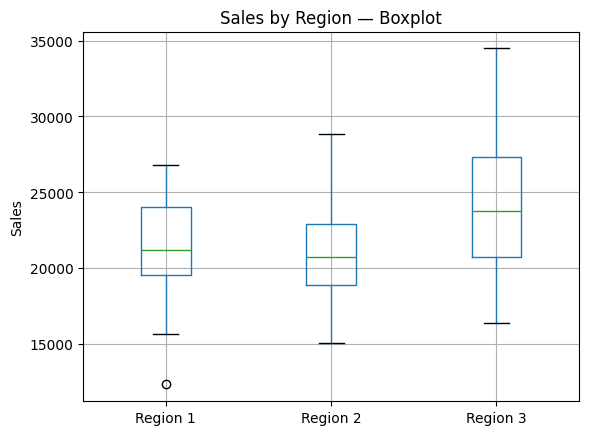

In [2]:
# Title: Exercise 3 — One-Way ANOVA Across >2 Groups
# Goal: Compare means of sales across three regions using SciPy's f_oneway (one-way ANOVA).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Seed for reproducibility
np.random.seed(0)

# Sales data across different regions
region1 = np.random.normal(20000, 3000, 30)  # Region 1 sales
region2 = np.random.normal(22000, 3500, 30)  # Region 2 sales
region3 = np.random.normal(25000, 5000, 30)  # Region 3 sales

sales_data = pd.DataFrame({
    'Region 1': region1,
    'Region 2': region2,
    'Region 3': region3
})

# ANOVA: H0 = all group means are equal; H1 = at least one mean differs
F_stat, p_val = f_oneway(region1, region2, region3)

print("One-Way ANOVA Results")
print("----------------------")
print(f"F-statistic: {F_stat:.4f}")
print(f"P-value    : {p_val:.6f}")

alpha = 0.05
if p_val < alpha:
    print("Decision   : Reject H0 — At least one region's mean sales differ significantly (α=0.05).")
else:
    print("Decision   : Fail to reject H0 — No significant difference among regions (α=0.05).")

# Quick visualization: boxplot by region
plt.figure()
sales_data.boxplot()
plt.title("Sales by Region — Boxplot")
plt.ylabel("Sales")
plt.show()

# Notes (English):
# - Assumptions: independence, approx. normality within groups, and homogeneity of variances.
# - If significant, use a post-hoc test (e.g., Tukey HSD) to identify which pairs differ.
# Reference: SciPy f_oneway docs (provided in the exercise prompt).

## Conclusion & Interpretation — Exercise 3 (One-Way ANOVA: Sales by Region)

### Results
- **F-statistic:** 6.8624  
- **P-value:** 0.001709  
- **Decision (α=0.05):** Reject H₀ — There is a statistically significant difference in average sales among the three regions.

### Interpretation
- A **p-value** of ~0.0017 is well below 0.05, indicating strong evidence that at least one region's mean sales differs from the others.
- **ANOVA limitation:** The test tells us that a difference exists but does **not** indicate which specific pairs of regions differ — for that, a **post-hoc test** (e.g., Tukey HSD) is needed.

### Boxplot Insights
- **Region 3** shows the highest median and the widest spread, suggesting both higher average sales and greater variability.
- **Region 1** has slightly higher median sales than Region 2, but less variability compared to Region 3.
- Outliers are present (e.g., Region 1 low value), which can influence both variance estimates and ANOVA assumptions.
- The difference in medians visually supports the ANOVA result — distributions are not fully overlapping.

### Key Takeaways
- ANOVA is appropriate here because we compared **more than two groups** simultaneously.
- Significant p-value + visual differences in medians and spread suggest **Region 3** may be driving the effect.
- Next step in practice: perform a **pairwise post-hoc analysis** to pinpoint where the differences occur.

## Exercise 4: Linear Regression Analysis

Linear Regression Results
-------------------------
Slope     : 2.487  (avg. score increase per +1 hour)
Intercept : 2.222  (estimated score at 0 hour)
R-squared : 0.9283  (proportion of variance explained)
P-value   : 0.000000
Std Error : 0.0698

Predicted score at 20 hours studied: 51.97


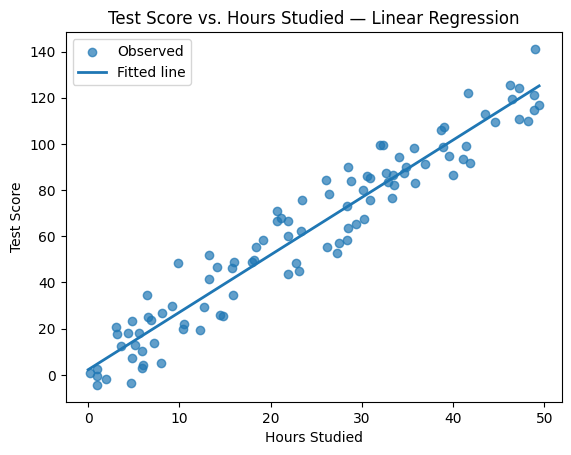

In [3]:
# Title: Exercise 4 — Simple Linear Regression with SciPy
# Goal: Regress Test Score on Hours Studied; interpret slope, intercept, and R^2.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Seed for reproducibility
np.random.seed(0)

# Sample data
X = np.random.rand(100) * 50  # Independent variable (e.g., hours studied)
Y = 2.5 * X + np.random.randn(100) * 10  # Dependent variable (e.g., test scores)

linear_regression_data = pd.DataFrame({
  'Hours Studied': X,
  'Test Score': Y
})

# Fit regression
res = linregress(linear_regression_data['Hours Studied'], linear_regression_data['Test Score'])

slope = res.slope
intercept = res.intercept
r = res.rvalue
r2 = r**2
p = res.pvalue
stderr = res.stderr

print("Linear Regression Results")
print("-------------------------")
print(f"Slope     : {slope:.3f}  (avg. score increase per +1 hour)")
print(f"Intercept : {intercept:.3f}  (estimated score at 0 hour)")
print(f"R-squared : {r2:.4f}  (proportion of variance explained)")
print(f"P-value   : {p:.6f}")
print(f"Std Error : {stderr:.4f}")

# Prediction example
hours_to_predict = 20.0
pred = slope * hours_to_predict + intercept
print(f"\nPredicted score at {hours_to_predict:.0f} hours studied: {pred:.2f}")

# Plot data + fitted line
plt.figure()
plt.scatter(linear_regression_data['Hours Studied'], linear_regression_data['Test Score'], alpha=0.7, label="Observed")
x_line = np.linspace(0, linear_regression_data['Hours Studied'].max(), 200)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, linewidth=2, label="Fitted line")
plt.title("Test Score vs. Hours Studied — Linear Regression")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.legend()
plt.show()

# Interpretation (English):
# - Slope > 0 suggests more study hours are associated with higher scores.
# - R^2 indicates how much of score variability is explained by hours studied alone.
# - P-value tests H0: slope==0. A small p-value supports a real positive association.

### Conclusion & Interpretation — Exercise 4 (Simple Linear Regression: Test Score vs. Hours Studied)

### Results
- **Slope:** 2.487 → On average, each additional hour studied is associated with an increase of about **+2.49 points** in test score.
- **Intercept:** 2.222 → Estimated score at 0 study hours (not meaningful in real life, but part of the regression model).
- **R-squared:** 0.9283 → About **92.8%** of the variability in test scores is explained by hours studied alone.
- **P-value:** < 0.000001 → Extremely strong evidence against the null hypothesis that slope = 0.
- **Standard error:** 0.0698 → Indicates high precision in estimating the slope.
- **Prediction:** For **20 hours studied**, predicted score ≈ **51.97**.

### Interpretation
- **Strong positive relationship**: High R² and positive slope confirm that study hours are a strong predictor of test performance.
- The fitted line closely follows the scatter plot points, indicating the model fits well.
- The **very low p-value** confirms the relationship is statistically significant.
- **Caution**: Regression here is simple (one predictor). In real-world educational data, other factors (e.g., prior knowledge, sleep, stress) also affect scores.

### Graph Insights
- The scatter plot shows a clear upward trend with relatively small residual scatter around the regression line.
- No obvious extreme outliers — the model’s assumptions (linearity, homoscedasticity) appear reasonable from visual inspection.

### Key Takeaways
- Linear regression can effectively quantify the relationship between a continuous predictor and response variable.
- High R² + low p-value + reasonable residual pattern → strong, reliable model in this context.